In [1]:
import numpy as np
import pandas as pd

deliveries = pd.read_csv('Datasets/deliveries.csv')
deliveries.head(3)

matches = pd.read_csv('Datasets/matches.csv')
matches.head()

full_data = deliveries.merge(matches, left_on='match_id', right_on='id')
full_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [2]:
# Number of players dismissed by fielding team for each over of the match

full_data.pivot_table(index ='over', columns=['bowling_team'], values='player_dismissed', aggfunc='count')

bowling_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,24,20,27,7,31,1,24,34,10,32,3,4,33,16
2,28,20,38,9,35,3,30,44,8,30,3,1,33,17
3,40,23,29,6,41,6,36,35,13,39,5,3,30,15
4,31,22,38,15,24,4,33,38,6,29,2,4,43,19
5,39,16,36,8,40,2,40,43,12,36,7,4,30,18
6,39,18,37,4,32,6,42,42,8,27,8,2,45,17
7,27,17,36,2,31,2,26,36,8,25,2,1,34,17
8,24,13,27,4,38,2,37,30,10,28,5,3,27,20
9,32,15,35,5,31,3,43,34,9,29,6,4,43,18


In [10]:
full_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [3]:
# Number of sixes hit in IPL in each over by each team

six = full_data[full_data['batsman_runs']==6]

six.pivot_table(index ='over', columns=['batting_team'], values='batsman_runs', aggfunc='count')

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='batting_team', ylabel='over'>

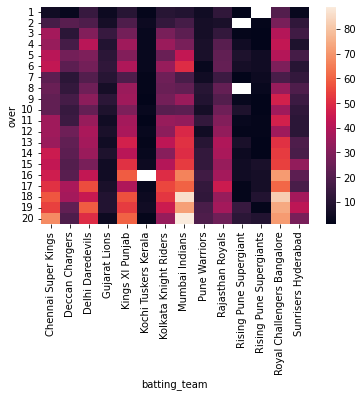

In [6]:
# Convert pivot table into heatmap

pt = six.pivot_table(index ='over', columns=['batting_team'], values='batsman_runs', aggfunc='count')

sns.heatmap(pt)

# We can clearly see that towards the end of the innings batsmans try to hit more sixes (denoted by lighter color)